**Analiza PKB nominalnego krajów UE (2022)**

Źródło danych: Eurostat API – dataset `nama_10_gdp`  
Kraje: Polska, Niemcy, Francja  
Jednostka: miliony EUR (ceny bieżące)

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import eurostat

**Pobranie i przygotowanie danych**

In [56]:
# Pobranie danych z Eurostatu
df_raw = eurostat.get_data_df('nama_10_gdp')
df_raw.head()

,freq,unit,na_item,geo\TIME_PERIOD,1975,1976,1977,1978,1979,1980,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,A,CLV05_MEUR,B1G,AL,NaN,NaN,NaN,NaN,NaN,NaN,...,7994.8,8305.9,8592.7,8914.3,9149.4,8927.2,9540.7,10039.3,10536.5,10873.1
1,A,CLV05_MEUR,B1G,AT,NaN,NaN,NaN,NaN,NaN,NaN,...,252957.6,258221.3,264412.6,271627.6,276482.8,259477.4,271146.4,288700.8,285720.1,282992.9
2,A,CLV05_MEUR,B1G,BA,NaN,NaN,NaN,NaN,NaN,NaN,...,9351.3,9650.5,9970.4,10347.6,10642.3,10350.5,11071.9,11532.7,11768.6,12040.2
3,A,CLV05_MEUR,B1G,BE,NaN,NaN,NaN,NaN,NaN,NaN,...,317686.5,320447.4,325019.4,331266.1,339917.3,325628.4,344167.9,358882.8,365291.4,368804.6
4,A,CLV05_MEUR,B1G,BG,NaN,NaN,NaN,NaN,NaN,NaN,...,26119.5,26792.6,27671.7,28520.4,29501.6,28605.8,30948.9,32655.7,32993.0,33912.7


In [57]:
# Filtrowanie: PKB nominalny (CP_MEUR), PKB w cenach rynkowych (B1GQ)
countries = ['PL', 'DE', 'FR']

df_filtered = df_raw[
    (df_raw['unit'] == 'CP_MEUR') & 
    (df_raw['na_item'] == 'B1GQ') & 
    (df_raw['geo\\TIME_PERIOD'].isin(countries))
]

# Wybór kolumn
geo_col = 'geo\\TIME_PERIOD'
year_col = '2022' if '2022' in df_filtered.columns else 2022
df_gdp = df_filtered.loc[:, [geo_col, year_col]].copy()
df_gdp.columns = ['country', 'gdp_2022']

# Mapowanie kodów na nazwy krajów
country_names = {'PL': 'Polska', 'DE': 'Niemcy', 'FR': 'Francja'}
df_gdp['country'] = df_gdp['country'].map(country_names)

# Czyszczenie indeksu
df_gdp = df_gdp.reset_index(drop=True)

df_gdp

,country,gdp_2022
0,Niemcy,3989390.0
1,Francja,2653997.2
2,Polska,661712.3


In [58]:
# Wydruk DataFrame z wartościami PKB
df_display = df_gdp.copy()
df_display['gdp_2022'] = df_display['gdp_2022'].apply(lambda x: f"{x:>14,.1f}")

print("PKB nominalne (miliony EUR) - 2022\n")
print(f"{'Kraj':<10} {'PKB (mln EUR)':>14}")
print("-" * 26)
for _, row in df_display.iterrows():
    print(f"{row['country']:<10} {row['gdp_2022']}")

PKB nominalne (miliony EUR) - 2022

Kraj        PKB (mln EUR)
--------------------------
Niemcy        3,989,390.0
Francja       2,653,997.2
Polska          661,712.3


**Uwaga:** Dane pobierane z API Eurostatu mogą różnić się od innych źródeł ze względu na regularne rewizje danych przez Eurostat. Wartości w tym notebooku odzwierciedlają aktualny stan danych w momencie pobrania.

**Wizualizacja - wersja 1: matplotlib**

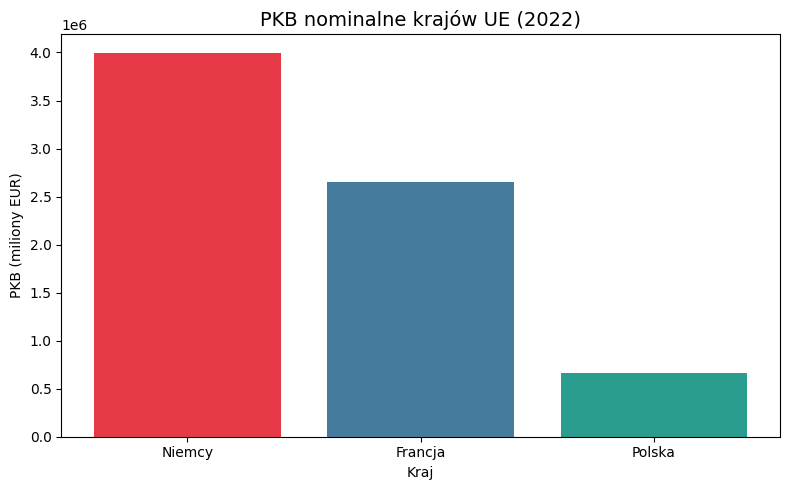

In [59]:
plt.figure(figsize=(8, 5))
plt.bar(df_gdp['country'], df_gdp['gdp_2022'], color=['#e63946', '#457b9d', '#2a9d8f'])
plt.title('PKB nominalne krajów UE (2022)', fontsize=14)
plt.ylabel('PKB (miliony EUR)')
plt.xlabel('Kraj')
plt.tight_layout()
plt.show()

**Wizualizacja - wersja 2: seaborn**

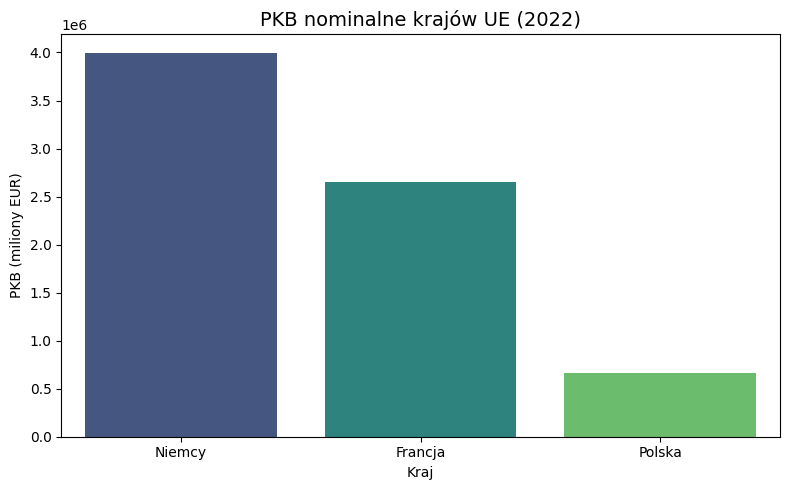

In [60]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_gdp, x='country', y='gdp_2022', palette='viridis', hue='country', legend=False)
plt.title('PKB nominalne krajów UE (2022)', fontsize=14)
plt.ylabel('PKB (miliony EUR)')
plt.xlabel('Kraj')
plt.tight_layout()
plt.show()

**Wizualizacja - wersja 3: plotly**

In [61]:
fig = px.bar(
    df_gdp, 
    x='country', 
    y='gdp_2022',
    color='country',
    title='PKB nominalne krajów UE (2022)',
    labels={'gdp_2022': 'PKB (miliony EUR)', 'country': 'Kraj'}
)
fig.show()